## KMean with 5 clusters, with normaliced data
The values of the centers are at the end, the algorithm converged to 21th iteration

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

### Import data, divide by train and test sets, plot data to train

In [2]:
file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)
print("data to train kmeans: ", len(df_train_Kmeans))
print("data to test kmean: ", len(df_test_kmeans))

data to train kmeans:  1077
data to test kmean:  270


In [3]:
# Initial data 
df_train_Kmeans.drop(["class"],axis=1, inplace=True)
# Scale robust due to outliers in data
#from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df_train_Kmeans)
np_train_scaled=transformer.transform(df_train_Kmeans)


#### data for train the model X_bank

In [14]:
X_bank=np.array(df_train_Kmeans)

In [15]:
#to define start points to my clusters , instead kmeans++ or random in KMeans from sklearn. 
#I make my own tester using random data


k=5

centers_C1= X_bank[115]
centers_C2= X_bank[450]
centers_C3= X_bank[590]
centers_C4= X_bank[860]
centers_C5= X_bank[935]

dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]
dist_5=[np.linalg.norm(xy- centers_C5) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , dist_5, n_cluster))


for indice,elemento  in enumerate(data_cluster):
    
    data_cluster[indice,7]=np.argmin(data_cluster[indice,2:7])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "dist_5" ,"n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4", "dist_5"],axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

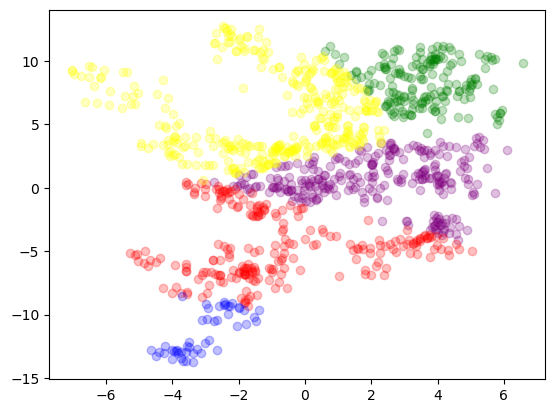

In [16]:
#k=1
cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)
plt.scatter(cluster5["V1"], cluster5["V2"], c="blue", alpha=0.25)
#plt.scatter(X_bank[:,0], X_bank[:,1], c="purple", alpha=0.25)

plt.show

(0.7138098533980582, 1.4458023459155338) (2.0191762324840763, 8.464012420382165) (2.895553018103448, -3.846229396551724) (-4.079320930232558, 4.940229069767441) (-2.5751257718120804, -8.219340268456376)


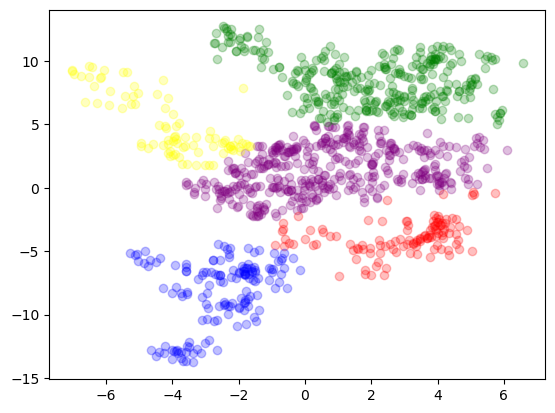

In [35]:
center_V1_C1=cluster1["V1"].sum() / len(cluster1)
center_V2_C1=cluster1["V2"].sum() / len(cluster1)
center_V1_C2=cluster2["V1"].sum() / len(cluster2)
center_V2_C2=cluster2["V2"].sum() / len(cluster2)
center_V1_C3=cluster3["V1"].sum() / len(cluster3)
center_V2_C3=cluster3["V2"].sum() / len(cluster3)
center_V1_C4=cluster4["V1"].sum() / len(cluster4)
center_V2_C4=cluster4["V2"].sum() / len(cluster4)
center_V1_C5=cluster5["V1"].sum() / len(cluster5)
center_V2_C5=cluster5["V2"].sum() / len(cluster5)

# Initial data 
X_bank=np.array(df_train_Kmeans)

centers_C1= (center_V1_C1, center_V2_C1)
centers_C2= (center_V1_C2, center_V2_C2)
centers_C3= (center_V1_C3, center_V2_C3)
centers_C4= (center_V1_C4, center_V2_C4)
centers_C5= (center_V1_C5, center_V2_C5)

print(centers_C1, centers_C2, centers_C3, centers_C4 , centers_C5 )


dist_1=[np.linalg.norm(xy- centers_C1) for xy in X_bank]
dist_2=[np.linalg.norm(xy- centers_C2) for xy in X_bank] 
dist_3=[np.linalg.norm(xy- centers_C3) for xy in X_bank]
dist_4=[np.linalg.norm(xy- centers_C4) for xy in X_bank]
dist_5=[np.linalg.norm(xy- centers_C5) for xy in X_bank]

n_cluster=[np.linalg.norm(xy- xy) for xy in X_bank]

data_cluster=np.column_stack((X_bank[:,0], X_bank[:,1], dist_1, dist_2, dist_3, dist_4 , dist_5, n_cluster))


for indice,elemento  in enumerate(data_cluster):
    data_cluster[indice,7]=np.argmin(data_cluster[indice,2:7])

df_bank=pd.DataFrame(data_cluster)
df_bank.columns=["V1", "V2", "dist_1" , "dist_2", "dist_3", "dist_4" , "dist_5" , "n_cluster" ]
df_bank.drop(["dist_1" , "dist_2", "dist_3", "dist_4", "dist_5"],axis=1, inplace=True)

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]
plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="red", alpha=0.25)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.25)
plt.scatter(cluster5["V1"], cluster5["V2"], c="blue", alpha=0.25)

$$
- 1
$$
- (2.112919725367647, 0.5714615791073528) 
- (3.565612937853107, 8.311143502824859) 
- (-0.7524338536480686, -4.564441858369098) 
- (-1.0133545106936417, 5.792358843930635) 
- (-3.0695938775510205, -11.423781632653062)
$$
- 2
$$
- (1.642861756269113, 0.7177138976061161) 
- (3.0253783640350873, 8.296299561403508) 
- (-0.527399436683417, -4.563198432160804) 
- (-1.5458294424124515, 5.811379377431907)
- (-2.9589636363636367, -10.671377272727272)
$$
- 3
$$
- (1.3330594654390935, 0.9644088569892351)
- (2.748679303543307, 8.303474803149607) 
- (-0.16066613350515463, -4.678833865979382) 
- (-1.949637367961165, 5.823074271844661)
- (-2.9494314285714296, -10.485608571428571)
$$
- 4
$$
- (1.0816628602666667, 1.3064276173791998) 
- (2.455550580882353, 8.459794117647059)
- (0.3007276889447236, -4.665800000000001) 
- (-2.4600278101265824, 5.695068354430379) 
- (-2.9481361643835617, -10.341302739726029)
$$
- 6
$$
- (0.9195311686684073, 1.5205748211937338)
- (2.149193872909699, 8.520145150501673)
- (0.854208145595855, -4.412070466321243) 
- (-3.1883931946902657, 5.19769203539823) 
- (-3.032397078651685, -9.644126966292136)
$$
- 7
$$
- (0.9160486348717949, 1.5732519397876923) 
- (2.048984620578778, 8.474877813504822) 
- (1.3422232267857144, -4.12480119047619) 
- (-3.8107979999999992, 4.911350526315789) 
- (-2.906912123893805, -8.986558407079647)
$$
- 8
$$
- (0.9372165066666667, 1.5882090679928202)
- (2.0191762324840763, 8.464012420382165)
- (1.7723444360544218, -3.8532224489795923) 
- (-3.962431182795698, 4.702151827956989)
- (-2.7224398496240605, -8.575879699248121)
$$
- 9
$$
- (0.9027003510204081, 1.5822437921357144) 
- (2.0191762324840763, 8.464012420382165) 
- (2.024494086428571, -3.813310214285715) 
- (-3.9903152173913035, 4.717185) 
- (-2.6958290647482017, -8.422094964028776)
$$
- 10
$$
- (0.8569231140664962, 1.5944564105299235) 
- (2.0191762324840763, 8.464012420382165) 
- (2.210192334057971, -3.7078914492753623) 
- (-4.018310989010988, 4.732844175824175)
- (-2.649921048951049, -8.340883216783217)
$$
- 11
$$
- (0.8202243306122449, 1.59076363907449) 
- (2.0191762324840763, 8.464012420382165) 
- (2.366889571111111, -3.651340074074074)
- (-4.04272, 4.7548524444444435) 
- (-2.6147586301369863, -8.280131506849314)
$$
- 12
$$
- (0.8065386741116751, 1.5832506256781724) 
- (2.0191762324840763, 8.464012420382165)
- (2.420326782706767, -3.6538925563909768) 
- (-4.062141573033708, 4.784864269662921) 
- (-2.603337619047619, -8.258503401360544)
$$
- 13
$$
- (0.8009537660759494, 1.5743912570055698) 
- (2.0191762324840763, 8.464012420382165) 
- (2.4492648643939394, -3.667056893939394) 
- (-4.062141573033708, 4.784864269662921)
- (-2.603337619047619, -8.258503401360544)
$$
- 14
$$
- (0.7948651324937028, 1.5580313514287154) 
- (2.0191762324840763, 8.464012420382165) 
- (2.493217246923077, -3.6977339230769224)
- (-4.062141573033708, 4.784864269662921) 
- (-2.603337619047619, -8.258503401360544)
$$
- 15
$$
- (0.7757673740000002, 1.537872291293) 
- (2.0191762324840763, 8.464012420382165) 
- (2.54560039140625, -3.726653984375) 
- (-4.06812159090909, 4.83578125) 
- (-2.603337619047619, -8.258503401360544)

$$
- 16
$$
- (0.7484597762376238, 1.5074742488049504) 
- (2.0191762324840763, 8.464012420382165) 
- (2.6413820007999997, -3.7652216800000002) 
- (-4.073579310344827, 4.888724942528735) 
- (-2.603337619047619, -8.258503401360544)
$$
- 17
$$
- (0.7202735931540343, 1.4700576198464546) 
- (2.0191762324840763, 8.464012420382165) 
- (2.7634611578512396, -3.821713305785124) 
- (-4.079320930232558, 4.940229069767441)
- (-2.603337619047619, -8.258503401360544)
$$
- 18
$$
- (0.7176846705596107, 1.4547023516233577) 
- (2.0191762324840763, 8.464012420382165)
- (2.8336646618644066, -3.8432407627118645) 
- (-4.079320930232558, 4.940229069767441) 
- (-2.5882483783783785, -8.24022972972973)
$$
- 20
$$
- (0.7138098533980582, 1.4458023459155338) 
- (2.0191762324840763, 8.464012420382165) 
- (2.895553018103448, -3.846229396551724) 
- (-4.079320930232558, 4.940229069767441) 
- (-2.5751257718120804, -8.219340268456376)
$$
- 21
$$
- (0.7138098533980582, 1.4458023459155338) 
- (2.0191762324840763, 8.464012420382165) 
- (2.895553018103448, -3.846229396551724) 
- (-4.079320930232558, 4.940229069767441) 
- (-2.5751257718120804, -8.219340268456376)